## Perceptron algorithm in plain Python

The perceptron is a simple supervised machine learning algorithm and one of the earliest **neural network** architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a **binary linear classifier** that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane.

The perceptron as follows.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^i = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{0,1\}$

The perceptron is a very simple neural network:
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses the Heaviside step function as its activation function

* * *
A perceptron is trained using **gradient descent**. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step 0: ** Initialize the weight vector and bias with zeros (or small random values).
* * *

**Step 1: ** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b$

where $\boldsymbol{X}$ is a matrix of shape $(n_{samples}, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2: ** Apply the Heaviside function, which returns binary values:

$\hat{y}^{(i)} = 1 \, if \, a^{(i)} \geq 0, \, else \, 0$
* * *

** Step 3: ** Compute the weight updates using the perceptron learning rule

\begin{equation}
\Delta \boldsymbol{w} = \eta \, \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)
\end{equation}
$$ \Delta b = \eta \, \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big) $$

where $\eta$ is the learning rate.
* * *

** Step 4: ** Update the weights and bias

\begin{equation}
\boldsymbol{w} = \boldsymbol{w} + \Delta \boldsymbol{w}
\end{equation}

$$
b = b  + \Delta b
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
np.random.seed(123)

%matplotlib inline

## Dataset

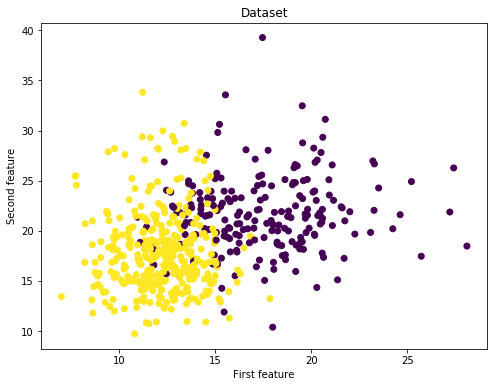

In [2]:
X, y = load_breast_cancer()['data'][:,:2], load_breast_cancer()['target']
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (426, 2)
Shape y_train: (426, 1))
Shape X_test: (143, 2)
Shape y_test: (143, 1)


## Perceptron model class

In [4]:
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape

        # Step 0: Initialize the parameters
        self.weights = X.mean(axis=0).reshape(-1,1)
        self.bias = X.mean()

        for i in range(n_iters):
            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias

            # Step 2: Compute the output
            y_predict = self.step_function(a)

            # Step 3: Compute weight updates
            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)

            # Step 4: Update the parameters
            self.weights += delta_w
            self.bias += delta_b

        return self.weights, self.bias

    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)

## Initialization and training the model

In [5]:
p = Perceptron()
w_trained, b_trained = p.train(X_train, y_train,learning_rate=0.00001, n_iters=2000)

## Testing

In [6]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

training accuracy: 88.96713615023474%
test accuracy: 91.60839160839161%


## Visualize decision boundary

In [7]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(10,20,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

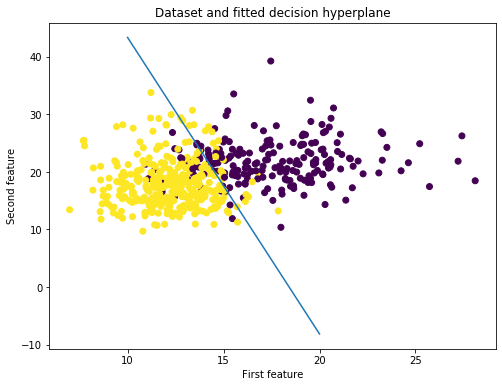

In [8]:
plot_hyperplane(X, y, w_trained, b_trained)